Attrition : word that is used to describe when an employee leaves and is not replaced in a company.

# Attrition prediction using Machine Learning

In [1]:
# Let's start by performing EDA on our data.
# We will use the pandas library to read in our data and perform some basic operations on it.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Now let's read in the data

df = pd.read_csv('HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [4]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
# Let's work each column one at a time to see what we can learn about the data.
sum__NA = []
for col in df.columns:
    print(f"Column: {col}")
    print(f"Unique values: {df[col].unique()}")
    print(f"Number of NA/missing values: {df[col].isnull().sum()}")
    sum__NA.append(df[col].isnull().sum())
    print("----")

Column: Age
Unique values: [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
Number of NA/missing values: 0
----
Column: Attrition
Unique values: ['Yes' 'No']
Number of NA/missing values: 0
----
Column: BusinessTravel
Unique values: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Number of NA/missing values: 0
----
Column: DailyRate
Unique values: [1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 11

In [8]:
sum__NA

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [9]:
# Create a dictionary mapping for each string column excluding already integer columns
column_mapping = {
    'Attrition': {'Yes': 0, 'No': 1},
    'BusinessTravel': {'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2},
    'Department': {'Sales': 0, 'Research & Development': 1, 'Human Resources': 2},
    'Gender': {'Female': 0, 'Male': 1},
    'MaritalStatus': {'Single': 0, 'Married': 1, 'Divorced': 2},
    'OverTime': {'No': 0, 'Yes': 1},
    'EducationField': {'Life Sciences': 0, 'Other': 1, 'Medical': 2, 'Marketing': 3, 'Technical Degree': 4, 'Human Resources': 5},
}



# Identify string columns for mapping
string_columns = [col for col in df.columns if df[col].dtype == 'object']
# Applying mapping to string columns
for col in string_columns:
    df[col] = df[col].map(column_mapping.get(col, {}))


In [10]:
# Checking if mapping was successful
# Select columns that are not of object type (non-string columns)
non_string_columns = df.select_dtypes(exclude=['object']).columns.tolist()

# Display non-string columns
print("Non-string columns:")
print(non_string_columns)


Non-string columns:
['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [12]:
df.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.838776,1.086395,802.485714,0.739456,9.192517,2.912925,1.462585,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.532170,403.509100,0.527792,8.106864,1.024165,1.431780,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,1.000000,1.000000,465.000000,0.000000,2.000000,2.000000,0.000000,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,1.000000,1.000000,802.000000,1.000000,7.000000,3.000000,2.000000,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1.000000,1.000000,1157.000000,1.000000,14.000000,4.000000,2.000000,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,1.0,2068.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [13]:
# Assuming your DataFrame is named 'df'
non_integer_string_columns = [col for col in df.columns if not df[col].apply(lambda x: isinstance(x, (int, str))).all()]

if len(non_integer_string_columns) > 0:
    print("Non-integer and non-string columns:")
    print(non_integer_string_columns)
else:
    print("All columns are either integers or strings.")


Non-integer and non-string columns:
['JobRole', 'Over18']


In [18]:
df['JobRole'].unique()

array([nan])

In [19]:
df['Over18'].unique()

array([nan])

In [20]:
# These 2 seem to be empty, so dropping the entire columns
df = df.drop(['Over18', 'EmployeeNumber'], axis=1)

In [21]:
df.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.838776,1.086395,802.485714,0.739456,9.192517,2.912925,1.462585,1.0,2.721769,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.532170,403.509100,0.527792,8.106864,1.024165,1.431780,0.0,1.093082,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,1.000000,1.000000,465.000000,0.000000,2.000000,2.000000,0.000000,1.0,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,1.000000,1.000000,802.000000,1.000000,7.000000,3.000000,2.000000,1.0,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1.000000,1.000000,1157.000000,1.000000,14.000000,4.000000,2.000000,1.0,4.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,1.0,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [22]:
# Assuming your DataFrame is named 'df'
non_integer_string_columns = [col for col in df.columns if not df[col].apply(lambda x: isinstance(x, (int, str))).all()]

if len(non_integer_string_columns) > 0:
    print("Non-integer and non-string columns:")
    print(non_integer_string_columns)
else:
    print("All columns are either integers or strings.")


Non-integer and non-string columns:
['JobRole']


In [24]:
df['JobRole'].unique()

array([nan])

In [25]:
# How did it give a new thing this time? Is there a memory limit? Or is it just random?
# It's possible that it's a memory limit, but I'm not sure. I think it's just random.

# nevertheless, let's drop JobRole as well

df = df.drop(['JobRole'], axis=1)

In [26]:
# Assuming your DataFrame is named 'df'
non_integer_string_columns = [col for col in df.columns if not df[col].apply(lambda x: isinstance(x, (int, str))).all()]

if len(non_integer_string_columns) > 0:
    print("Non-integer and non-string columns:")
    print(non_integer_string_columns)
else:
    print("All columns are either integers or strings.")


All columns are either integers or strings.


In [28]:
# Now it seems like all columns are either integers or strings. 
# Let's check the data types of all columns again.

# Check if all columns are of type 'int'
all_integer_columns = df.dtypes.apply(lambda x: x == 'int64' or x == 'int32').all()

if all_integer_columns:
    print("All columns are integers.")
else:
    print("Not all columns are integers.")


All columns are integers.


In [29]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [30]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,0,1,1102,0,1,2,0,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,1,2,279,1,8,1,0,1,3,...,4,80,1,10,3,3,10,7,1,7
2,37,0,1,1373,1,2,2,1,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,1,2,1392,1,3,4,0,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,1,1,591,1,2,1,2,1,1,...,4,80,1,6,3,3,2,2,2,2


In [31]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

# Done with preprocessing

I think now's a good time to check out what is this dataset all about. 

In [32]:
# For future me, if I lose this, when I'm trying to do the same thing for a different dataset, here's the reference mapping done in the preprocessing step.
'''
column_mapping = {
    'Attrition': {'Yes': 0, 'No': 1},
    'BusinessTravel': {'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2},
    'Department': {'Sales': 0, 'Research & Development': 1, 'Human Resources': 2},
    'Gender': {'Female': 0, 'Male': 1},
    'MaritalStatus': {'Single': 0, 'Married': 1, 'Divorced': 2},
    'OverTime': {'No': 0, 'Yes': 1},
    'EducationField': {'Life Sciences': 0, 'Other': 1, 'Medical': 2, 'Marketing': 3, 'Technical Degree': 4, 'Human Resources': 5},
}
'''

"\ncolumn_mapping = {\n    'Attrition': {'Yes': 0, 'No': 1},\n    'BusinessTravel': {'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2},\n    'Department': {'Sales': 0, 'Research & Development': 1, 'Human Resources': 2},\n    'Gender': {'Female': 0, 'Male': 1},\n    'MaritalStatus': {'Single': 0, 'Married': 1, 'Divorced': 2},\n    'OverTime': {'No': 0, 'Yes': 1},\n    'EducationField': {'Life Sciences': 0, 'Other': 1, 'Medical': 2, 'Marketing': 3, 'Technical Degree': 4, 'Human Resources': 5},\n}\n"

In [38]:
# import pandas as pd

# # Assuming 'df' is your DataFrame containing the attrition data

# # Summary statistics
# summary_stats = df.describe().transpose()

# # Unique value counts for categorical columns
# unique_counts = pd.DataFrame()
# for col in df.columns:
#     if df[col].dtype == 'object':
#         unique_counts[col] = [df[col].nunique()]

# # Styling the summary statistics table with dark background and numeric values
# styled_summary = summary_stats.style\
#     .set_caption('Summary Statistics')\
#     .set_table_styles([{
#         'selector': 'caption',
#         'props': [
#             ('color', 'white'),
#             ('font-size', '18px'),
#             ('text-align', 'center'),
#             ('font-weight', 'bold')
#         ]
#     }, {
#         'selector': 'th',
#         'props': [
#             ('background-color', '#333333'),
#             ('color', 'white'),
#             ('font-weight', 'bold')
#         ]
#     }, {
#         'selector': 'td',
#         'props': [
#             ('background-color', '#666666'),
#             ('color', 'white')
#         ]
#     }, {
#         'selector': '.data',
#         'props': [
#             ('text-align', 'center')
#         ]
#     }])\
#     .format('{:.2f}')

# # Styling the unique value counts table with dark background and numeric values
# styled_unique_counts = unique_counts.style\
#     .set_caption('Unique Value Counts')\
#     .set_table_styles([{
#         'selector': 'caption',
#         'props': [
#             ('color', 'white'),
#             ('font-size', '18px'),
#             ('text-align', 'center'),
#             ('font-weight', 'bold')
#         ]
#     }, {
#         'selector': 'th',
#         'props': [
#             ('background-color', '#333333'),
#             ('color', 'white'),
#             ('font-weight', 'bold')
#         ]
#     }, {
#         'selector': 'td',
#         'props': [
#             ('background-color', '#666666'),
#             ('color', 'white')
#         ]
#     }, {
#         'selector': '.data',
#         'props': [
#             ('text-align', 'center')
#         ]
#     }])

# # Display the styled tables
# display(styled_summary)
# display(styled_unique_counts)


In [39]:
import pandas as pd

# Assuming 'df' is your DataFrame containing the attrition data

# Summary statistics
summary_stats = df.describe().transpose()

# Unique value counts for categorical columns
unique_counts = pd.DataFrame(columns=['Unique Values'])
for col in df.columns:
    if df[col].dtype == 'object':
        unique_counts.loc[col] = [df[col].nunique()]

# Styling the summary statistics table with dark background and numeric values
styled_summary = summary_stats.style\
    .set_caption('Summary Statistics')\
    .set_table_styles([{
        'selector': 'caption',
        'props': [
            ('color', 'white'),
            ('font-size', '18px'),
            ('text-align', 'center'),
            ('font-weight', 'bold')
        ]
    }, {
        'selector': 'th',
        'props': [
            ('background-color', '#333333'),
            ('color', 'white'),
            ('font-weight', 'bold')
        ]
    }, {
        'selector': 'td',
        'props': [
            ('background-color', '#666666'),
            ('color', 'white')
        ]
    }, {
        'selector': '.data',
        'props': [
            ('text-align', 'center')
        ]
    }])\
    .format('{:.2f}')

# Styling the unique value counts table with dark background
styled_unique_counts = unique_counts.style\
    .set_caption('Unique Value Counts')\
    .set_table_styles([{
        'selector': 'caption',
        'props': [
            ('color', 'white'),
            ('font-size', '18px'),
            ('text-align', 'center'),
            ('font-weight', 'bold')
        ]
    }, {
        'selector': 'th',
        'props': [
            ('background-color', '#333333'),
            ('color', 'white'),
            ('font-weight', 'bold')
        ]
    }, {
        'selector': 'td',
        'props': [
            ('background-color', '#666666'),
            ('color', 'white')
        ]
    }, {
        'selector': '.data',
        'props': [
            ('text-align', 'center')
        ]
    }])

# Display the styled tables
display(styled_summary)
display(styled_unique_counts)


,count,mean,std,min,25%,50%,75%,max
Age,1470.00,36.92,9.14,18.00,30.00,36.00,43.00,60.00
Attrition,1470.00,0.84,0.37,0.00,1.00,1.00,1.00,1.00
BusinessTravel,1470.00,1.09,0.53,0.00,1.00,1.00,1.00,2.00
DailyRate,1470.00,802.49,403.51,102.00,465.00,802.00,1157.00,1499.00
Department,1470.00,0.74,0.53,0.00,0.00,1.00,1.00,2.00
DistanceFromHome,1470.00,9.19,8.11,1.00,2.00,7.00,14.00,29.00
Education,1470.00,2.91,1.02,1.00,2.00,3.00,4.00,5.00
EducationField,1470.00,1.46,1.43,0.00,0.00,2.00,2.00,5.00
EmployeeCount,1470.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00
EnvironmentSatisfaction,1470.00,2.72,1.09,1.00,2.00,3.00,4.00,4.00


,Unique Values


The Unique_Value_counts further solidifies that we for sure have a dataset which only has numerical features. This is good and should make it easy for us to work with the table and it should have no issus the same.

Column: Age
Mean: 36.923809523809524
Median: 36.0
Standard Deviation: 9.135373489136732
Minimum: 18
Maximum: 60



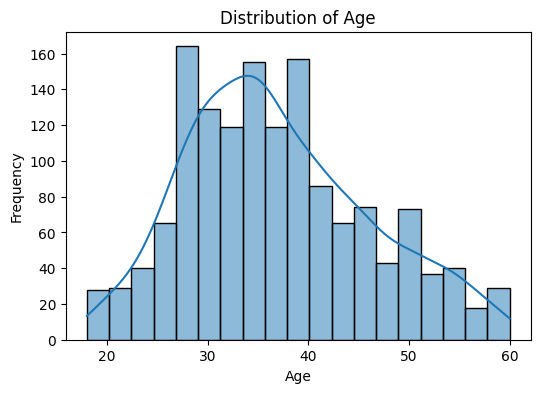

Column: DailyRate
Mean: 802.4857142857143
Median: 802.0
Standard Deviation: 403.50909994352816
Minimum: 102
Maximum: 1499



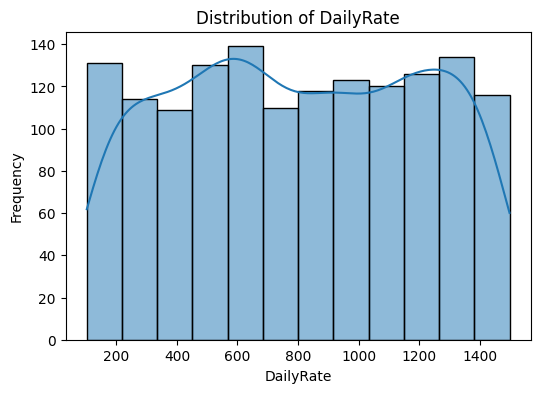

Column: DistanceFromHome
Mean: 9.19251700680272
Median: 7.0
Standard Deviation: 8.106864435666074
Minimum: 1
Maximum: 29



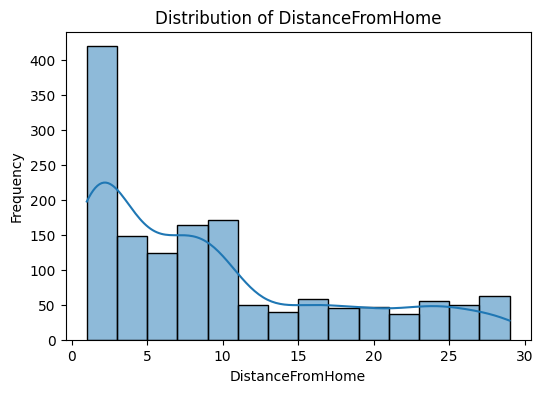

Column: Education
Mean: 2.912925170068027
Median: 3.0
Standard Deviation: 1.0241649445978729
Minimum: 1
Maximum: 5



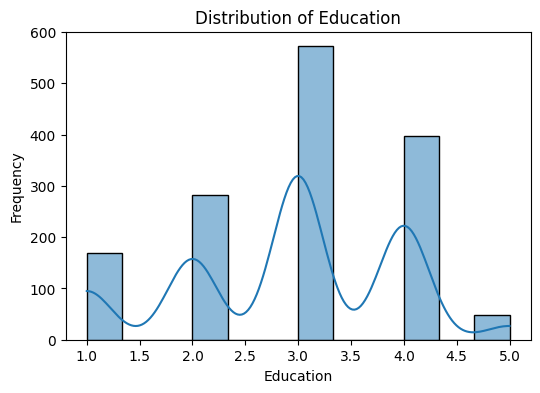

Column: HourlyRate
Mean: 65.89115646258503
Median: 66.0
Standard Deviation: 20.329427593996165
Minimum: 30
Maximum: 100



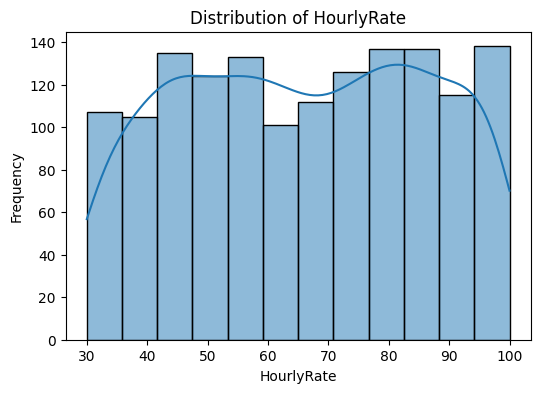

Column: JobInvolvement
Mean: 2.7299319727891156
Median: 3.0
Standard Deviation: 0.7115611429632304
Minimum: 1
Maximum: 4



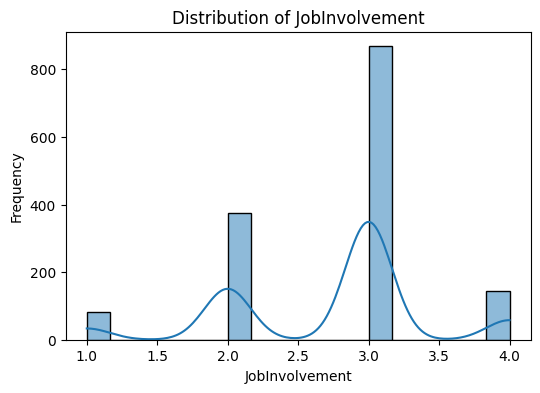

Column: JobLevel
Mean: 2.0639455782312925
Median: 2.0
Standard Deviation: 1.106939898935122
Minimum: 1
Maximum: 5



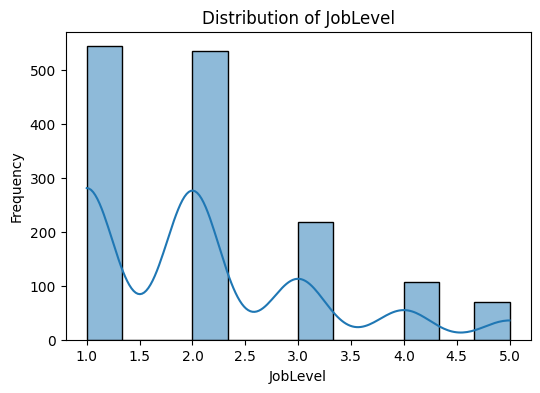

Column: JobSatisfaction
Mean: 2.7285714285714286
Median: 3.0
Standard Deviation: 1.1028461230547204
Minimum: 1
Maximum: 4



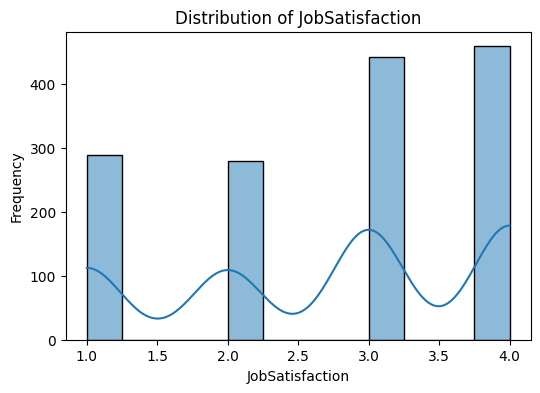

Column: MonthlyIncome
Mean: 6502.931292517007
Median: 4919.0
Standard Deviation: 4707.956783097994
Minimum: 1009
Maximum: 19999



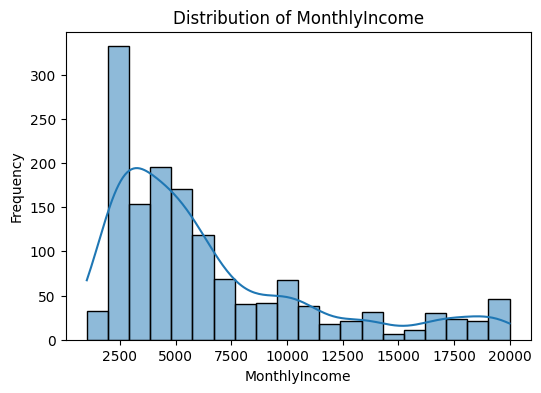

Column: MonthlyRate
Mean: 14313.103401360544
Median: 14235.5
Standard Deviation: 7117.786044059976
Minimum: 2094
Maximum: 26999



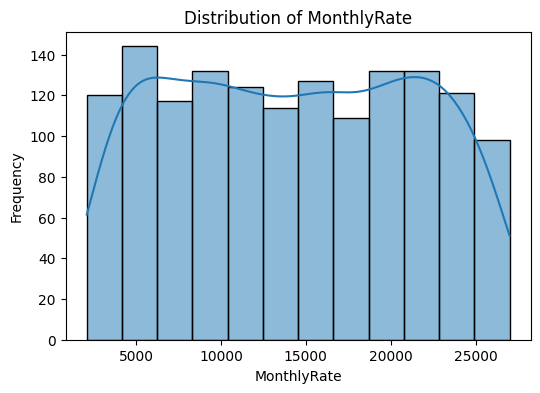

Column: NumCompaniesWorked
Mean: 2.6931972789115646
Median: 2.0
Standard Deviation: 2.498009006070747
Minimum: 0
Maximum: 9



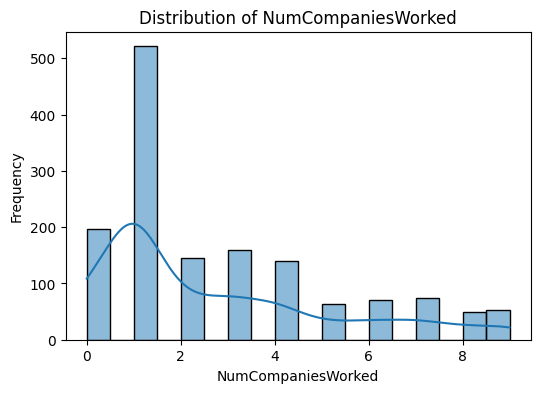

Column: PercentSalaryHike
Mean: 15.209523809523809
Median: 14.0
Standard Deviation: 3.6599377165396407
Minimum: 11
Maximum: 25



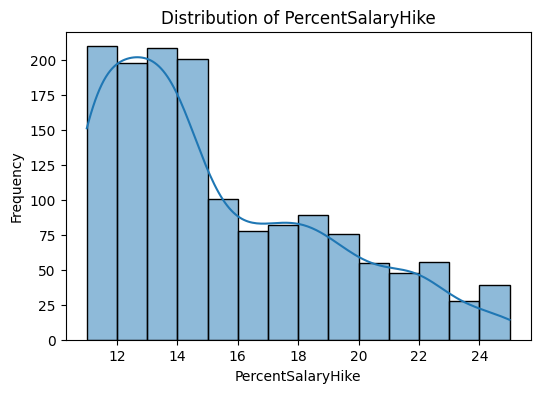

Column: PerformanceRating
Mean: 3.1537414965986397
Median: 3.0
Standard Deviation: 0.36082352460434397
Minimum: 3
Maximum: 4



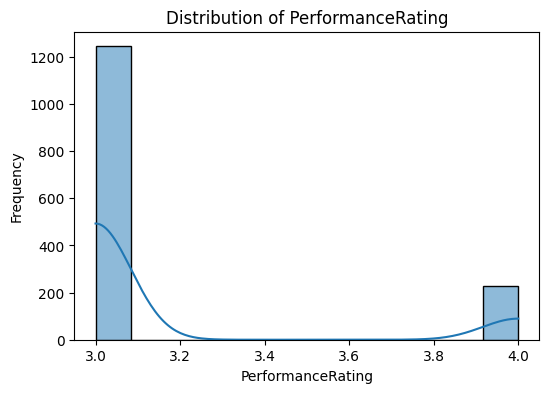

Column: RelationshipSatisfaction
Mean: 2.7122448979591836
Median: 3.0
Standard Deviation: 1.0812088864403524
Minimum: 1
Maximum: 4



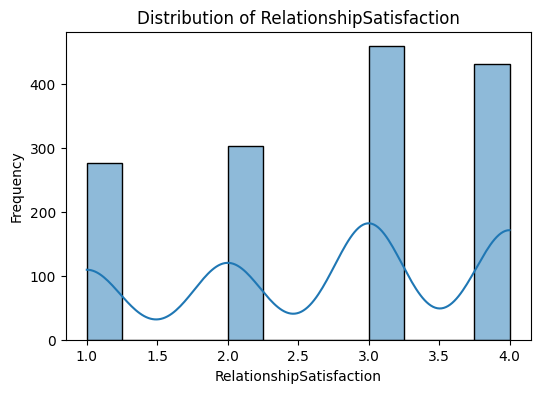

Column: StandardHours
Mean: 80.0
Median: 80.0
Standard Deviation: 0.0
Minimum: 80
Maximum: 80



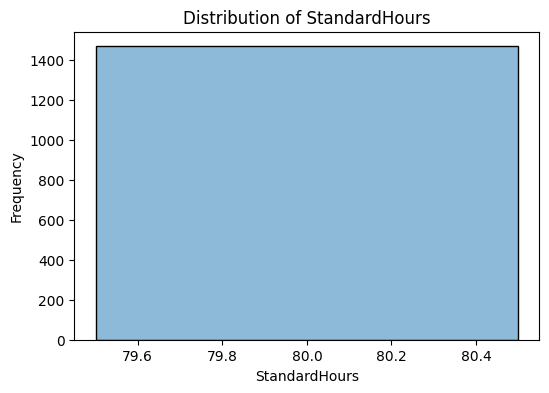

Column: StockOptionLevel
Mean: 0.7938775510204081
Median: 1.0
Standard Deviation: 0.852076667930838
Minimum: 0
Maximum: 3



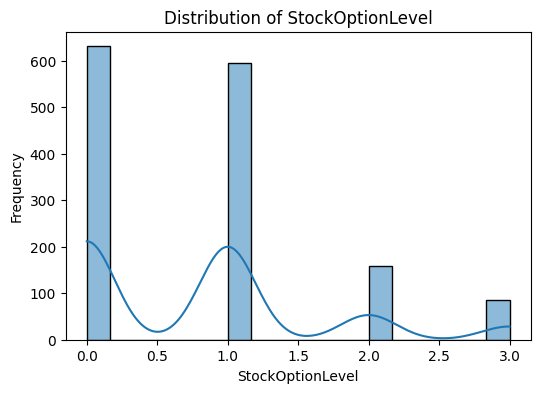

Column: TotalWorkingYears
Mean: 11.279591836734694
Median: 10.0
Standard Deviation: 7.780781675514997
Minimum: 0
Maximum: 40



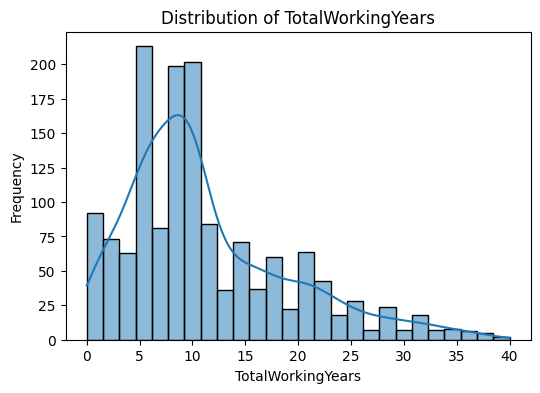

Column: TrainingTimesLastYear
Mean: 2.7993197278911564
Median: 3.0
Standard Deviation: 1.2892706207958455
Minimum: 0
Maximum: 6



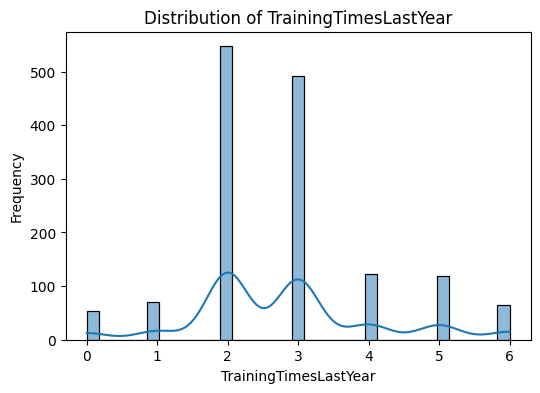

Column: WorkLifeBalance
Mean: 2.7612244897959184
Median: 3.0
Standard Deviation: 0.7064758297141507
Minimum: 1
Maximum: 4



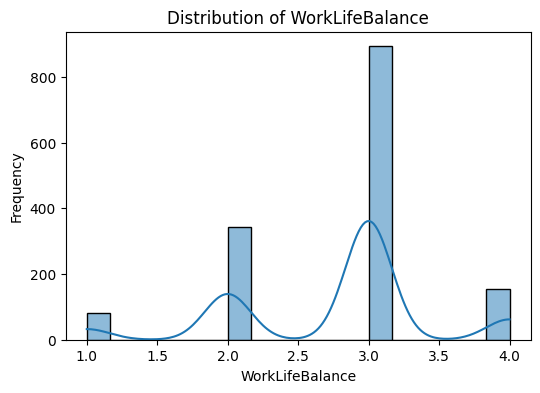

Column: YearsAtCompany
Mean: 7.0081632653061225
Median: 5.0
Standard Deviation: 6.126525152403569
Minimum: 0
Maximum: 40



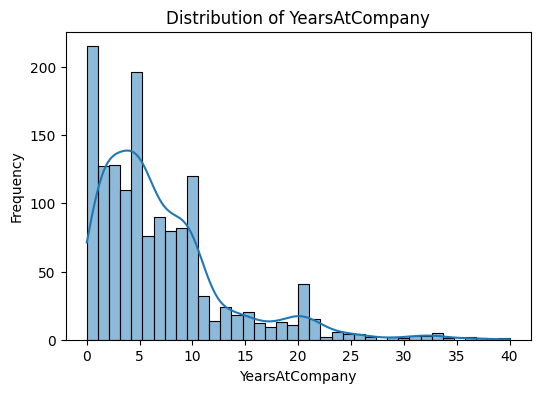

Column: YearsInCurrentRole
Mean: 4.229251700680272
Median: 3.0
Standard Deviation: 3.623137034670628
Minimum: 0
Maximum: 18



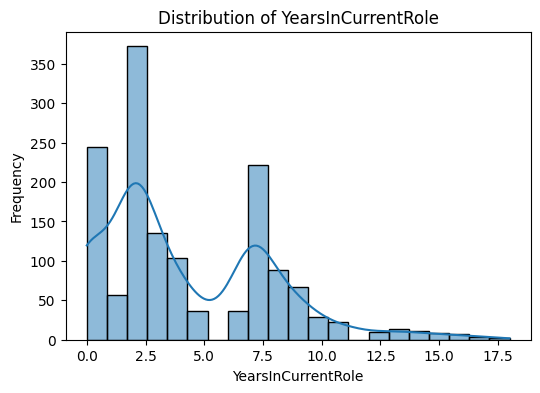

Column: YearsSinceLastPromotion
Mean: 2.1877551020408164
Median: 1.0
Standard Deviation: 3.222430279137967
Minimum: 0
Maximum: 15



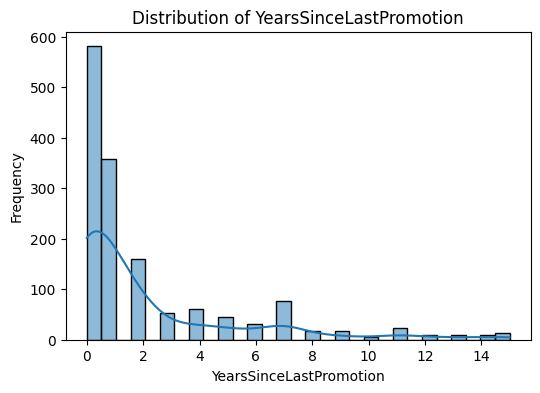

Column: YearsWithCurrManager
Mean: 4.12312925170068
Median: 3.0
Standard Deviation: 3.5681361205404376
Minimum: 0
Maximum: 17



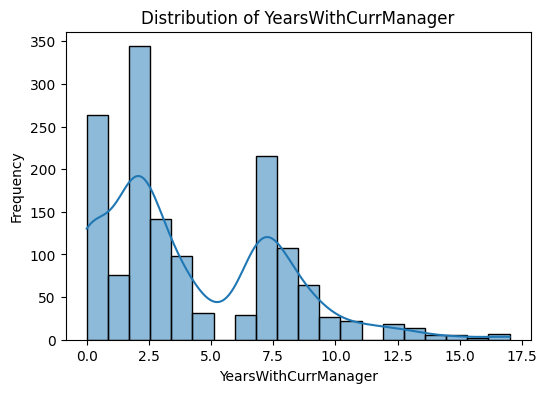

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'HourlyRate', 
                     'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 
                     'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 
                     'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 
                     'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 
                     'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 
                     'YearsSinceLastPromotion', 'YearsWithCurrManager']

for column in numerical_columns:
    print(f"Column: {column}")
    print(f"Mean: {df[column].mean()}")
    print(f"Median: {df[column].median()}")
    print(f"Standard Deviation: {df[column].std()}")
    print(f"Minimum: {df[column].min()}")
    print(f"Maximum: {df[column].max()}")
    print()

    # Visualize distribution of numerical columns
    plt.figure(figsize=(6, 4))
    sns.histplot(df[column], kde=True)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()


In [41]:
import pandas as pd

# Define your DataFrame 'df' here

# Calculate descriptive statistics for all columns
statistics = df.describe(include='all').transpose()

# Print the statistics for all columns
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(statistics)


                           count          mean          std     min     25%  \
Age                       1470.0     36.923810     9.135373    18.0    30.0   
Attrition                 1470.0      0.838776     0.367863     0.0     1.0   
BusinessTravel            1470.0      1.086395     0.532170     0.0     1.0   
DailyRate                 1470.0    802.485714   403.509100   102.0   465.0   
Department                1470.0      0.739456     0.527792     0.0     0.0   
DistanceFromHome          1470.0      9.192517     8.106864     1.0     2.0   
Education                 1470.0      2.912925     1.024165     1.0     2.0   
EducationField            1470.0      1.462585     1.431780     0.0     0.0   
EmployeeCount             1470.0      1.000000     0.000000     1.0     1.0   
EnvironmentSatisfaction   1470.0      2.721769     1.093082     1.0     2.0   
Gender                    1470.0      0.600000     0.490065     0.0     0.0   
HourlyRate                1470.0     65.891156    20

In [43]:
# Age: The employees' age ranges from 18 to 60, with an average (mean) age of around 37 years. The majority of employees seem to be relatively young or in the middle-aged bracket, as the median age is 36.

# DailyRate: The average daily rate is around 802, with values ranging from 102 to 1499. The distribution seems to be quite spread out, with a relatively high standard deviation of approximately 403.

# DistanceFromHome: Employees' commute distances vary notably, with an average distance of around 9.19 miles. The distances range from 1 to 29 miles, indicating a broad range of commuting distances.

# Education: The education level varies from 1 to 5, with an average education level around 2.91. The distribution appears to lean towards higher education levels, given the median at 3.

# HourlyRate: The average hourly rate is approximately 65.89, with rates spanning from 30 to 100. The standard deviation of around 20 suggests some variability in the hourly pay.

# JobInvolvement: Employees' job involvement is mostly moderate, with a mean of 2.73 and a median of 3. The scale ranges from 1 to 4.

# JobLevel: The average job level is around 2.06, with levels ranging from 1 to 5. There appears to be a substantial number of employees at lower job levels.

# JobSatisfaction: Employees seem moderately satisfied on average, with a mean satisfaction level of 2.73, on a scale from 1 to 4.

# MonthlyIncome: The average monthly income is approximately 6502, ranging from 1009 to 19999. There's a significant variability in incomes, indicated by the relatively high standard deviation.

# MonthlyRate: The monthly rate of employees spans from 2094 to 26999, with an average rate around 14313. This varies considerably among employees.

# NumCompaniesWorked: On average, employees have worked for around 2.69 companies, with a range of 0 to 9 companies. This indicates a fair amount of variation in previous work experiences.

# PercentSalaryHike: The percent salary hike ranges from 11 to 25, with an average hike of approximately 15.21 percent.

# PerformanceRating: Employees generally have a performance rating of 3.15, on a scale from 3 to 4.

# RelationshipSatisfaction: The mean relationship satisfaction level is approximately 2.71, on a scale from 1 to 4. It appears that satisfaction might be slightly skewed towards the lower end.

# StandardHours: The standard hours are consistently 80 hours, with no variability (standard deviation of 0).

# StockOptionLevel: On average, employees have a stock option level of around 0.79, ranging from 0 to 3.

# TotalWorkingYears: Employees have an average of 11.28 years of total work experience, ranging from 0 to 40 years.

# TrainingTimesLastYear: On average, employees have been trained around 2.8 times last year, ranging from 0 to 6 times.

# WorkLifeBalance: The mean work-life balance score is around 2.76, on a scale from 1 to 4. It seems that work-life balance leans towards the moderate side.

# YearsAtCompany: The average tenure at the company is approximately 7 years, ranging from 0 to 40 years.

# YearsInCurrentRole: Employees typically spend around 4.23 years in their current roles, with a range from 0 to 18 years.

# YearsSinceLastPromotion: On average, it's been around 2.19 years since the last promotion, varying from 0 to 15 years.

# YearsWithCurrManager: Employees, on average, have around 4.12 years of experience with their current managers, ranging from 0 to 17 years.


In [44]:
from sklearn.model_selection import train_test_split

# Define features (X) and the target variable (y)
X = df.drop('Attrition', axis=1)  # Features
y = df['Attrition']  # Target variable

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (1176, 31)
X_test shape: (294, 31)
y_train shape: (1176,)
y_test shape: (294,)


# Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

logistic_regression = LogisticRegression(max_iter=1000)

logistic_regression.fit(X_train, y_train)

y_pred = logistic_regression.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print(classification_report(y_test, y_pred))


Accuracy: 0.87
              precision    recall  f1-score   support

           0       0.62      0.13      0.21        39
           1       0.88      0.99      0.93       255

    accuracy                           0.87       294
   macro avg       0.75      0.56      0.57       294
weighted avg       0.85      0.87      0.84       294



C:\Users\alikh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

decision_tree = DecisionTreeClassifier()

decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print(classification_report(y_test, y_pred))


Accuracy: 0.78
              precision    recall  f1-score   support

           0       0.19      0.21      0.20        39
           1       0.88      0.86      0.87       255

    accuracy                           0.78       294
   macro avg       0.53      0.53      0.53       294
weighted avg       0.78      0.78      0.78       294



# Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

accuracy = random_forest.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.8707482993197279


# Gradient Boosting Machine (GBM) Classifier

In [49]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

gbm.fit(X_train, y_train)

y_pred = gbm.predict(X_test)

accuracy = gbm.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.8843537414965986


After a quick chat with chatgpt, here are some of the other models we will be using:

XGBoost: A scalable and efficient implementation of gradient boosting that often delivers very good results.

LightGBM: Similar to XGBoost but optimized for large datasets, offering faster training speed and lower memory usage.

CatBoost: Handles categorical data seamlessly and provides robust performance with less need for extensive data preprocessing.

Support Vector Machines (SVM): Effective for smaller datasets, especially when the features are well-separated.

Neural Networks (Deep Learning): Multi-layered artificial neural networks, suitable for complex patterns in large datasets. Variants include CNNs (Convolutional Neural Networks) and RNNs (Recurrent Neural Networks).

K-Nearest Neighbors (KNN): Uses a similarity measure to make predictions based on the majority of k similar instances.

Naive Bayes: A probabilistic classifier based on Bayes' theorem, often used for text classification but can be applied to other types of data.

Ensemble Methods: Techniques like Voting Classifier, Stacking, and Bagging, which combine multiple models to improve overall performance.

# XGBoost

In [50]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

accuracy = xgb.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.8605442176870748


# LightGBM

In [51]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

lgbm.fit(X_train, y_train)

y_pred = lgbm.predict(X_test)

accuracy = lgbm.score(X_test, y_test)
print("Accuracy:", accuracy)


[LightGBM] [Info] Number of positive: 978, number of negative: 198
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000411 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1126
[LightGBM] [Info] Number of data points in the train set: 1176, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.831633 -> initscore=1.597243
[LightGBM] [Info] Start training from score 1.597243
Accuracy: 0.8775510204081632


# CatBoost

In [53]:
from catboost import CatBoostClassifier

catboost = CatBoostClassifier(iterations=100, learning_rate=0.1, random_state=42)

catboost.fit(X_train, y_train)

y_pred = catboost.predict(X_test)

accuracy = catboost.score(X_test, y_test)
print("Accuracy:", accuracy)


0:	learn: 0.6305890	total: 149ms	remaining: 14.8s
1:	learn: 0.5745976	total: 152ms	remaining: 7.42s
2:	learn: 0.5240762	total: 153ms	remaining: 4.94s
3:	learn: 0.4825281	total: 154ms	remaining: 3.7s
4:	learn: 0.4481633	total: 156ms	remaining: 2.95s
5:	learn: 0.4172905	total: 158ms	remaining: 2.47s
6:	learn: 0.3979585	total: 159ms	remaining: 2.12s
7:	learn: 0.3842164	total: 161ms	remaining: 1.85s
8:	learn: 0.3694872	total: 163ms	remaining: 1.64s
9:	learn: 0.3544040	total: 164ms	remaining: 1.47s
10:	learn: 0.3422776	total: 165ms	remaining: 1.34s
11:	learn: 0.3320117	total: 167ms	remaining: 1.23s
12:	learn: 0.3237371	total: 169ms	remaining: 1.13s
13:	learn: 0.3137150	total: 170ms	remaining: 1.04s
14:	learn: 0.3066257	total: 172ms	remaining: 973ms
15:	learn: 0.3011478	total: 173ms	remaining: 909ms
16:	learn: 0.2962549	total: 175ms	remaining: 853ms
17:	learn: 0.2923584	total: 177ms	remaining: 805ms
18:	learn: 0.2875787	total: 178ms	remaining: 760ms
19:	learn: 0.2838360	total: 180ms	remainin

# SVM

In [52]:
from sklearn.svm import SVC

# Creating the SVM classifier
svm = SVC(kernel='linear', random_state=42)

# Training the model
svm.fit(X_train, y_train)

# Predicting on the test set
y_pred = svm.predict(X_test)

# Evaluating the model
accuracy = svm.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.8605442176870748


# Deep Learning effort

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

input_shape = X_train.shape[1]

model = Sequential()

# Add input layer and first hidden layer
model.add(Dense(units=64, activation='relu', input_shape=(input_shape,)))
model.add(Dropout(0.5))  # Optional: add dropout for regularization

# Add more hidden layers 
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.5))

# Add output layer
model.add(Dense(units=1, activation='sigmoid'))  # Binary classification

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
37/37 [==============================] - 1s 4ms/step - loss: 559.8458 - accuracy: 0.6760 - val_loss: 241.8625 - val_accuracy: 0.8673
Epoch 2/10
37/37 [==============================] - 0s 2ms/step - loss: 340.5836 - accuracy: 0.7313 - val_loss: 118.6641 - val_accuracy: 0.8673
Epoch 3/10
37/37 [==============================] - 0s 2ms/step - loss: 234.0128 - accuracy: 0.7355 - val_loss: 99.7280 - val_accuracy: 0.8673
Epoch 4/10
37/37 [==============================] - 0s 2ms/step - loss: 184.0203 - accuracy: 0.7389 - val_loss: 85.0876 - val_accuracy: 0.8673
Epoch 5/10
37/37 [==============================] - 0s 2ms/step - loss: 139.3293 - accuracy: 0.7355 - val_loss: 61.0504 - val_accuracy: 0.8673
Epoch 6/10
37/37 [==============================] - 0s 2ms/step - loss: 113.4131 - accuracy: 0.7423 - val_loss: 37.8994 - val_accuracy: 0.8673
Epoch 7/10
37/37 [==============================] - 0s 2ms/step - loss: 92.3362 - accuracy: 0.7389 - val_loss: 26.0676 - val_accuracy: 0.867

# KNN

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=5) 

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of KNN: {accuracy:.4f}")


Accuracy of KNN: 0.8469


# Naive Bayes

In [57]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

nb = GaussianNB()

nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Gaussian Naive Bayes: {accuracy:.4f}")


Accuracy of Gaussian Naive Bayes: 0.8367


In [58]:
from sklearn.naive_bayes import MultinomialNB

nb_multinomial = MultinomialNB()

nb_multinomial.fit(X_train, y_train)

y_pred_multinomial = nb_multinomial.predict(X_test)

accuracy_multinomial = accuracy_score(y_test, y_pred_multinomial)
print(f"Accuracy of Multinomial Naive Bayes: {accuracy_multinomial:.4f}")


Accuracy of Multinomial Naive Bayes: 0.5612


In [59]:
from sklearn.naive_bayes import BernoulliNB

nb_bernoulli = BernoulliNB()

nb_bernoulli.fit(X_train, y_train)

y_pred_bernoulli = nb_bernoulli.predict(X_test)

accuracy_bernoulli = accuracy_score(y_test, y_pred_bernoulli)
print(f"Accuracy of Bernoulli Naive Bayes: {accuracy_bernoulli:.4f}")


Accuracy of Bernoulli Naive Bayes: 0.8299


# Adaboost

In [60]:
from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier(n_estimators=100, random_state=42)

adaboost.fit(X_train, y_train)

y_pred_ab = adaboost.predict(X_test)

accuracy_ab = accuracy_score(y_test, y_pred_ab)
print(f"Accuracy of AdaBoost Classifier: {accuracy_ab:.4f}")


Accuracy of AdaBoost Classifier: 0.8673
